In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

#  Loading datset

In [15]:
df=pd.read_csv('train_normalized.csv')
df.head()

,Country,Year,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,Afghanistan,2007,102.3,0.891868,5.294118,1.082288,5.784924,0.990978,6.811815,0.516645,0.012523,3.727206,1.742698,1.392047
1,Albania,2007,70.5,1.083986,7.647059,2.604912,9.177459,3.968864,7.862571,1.868172,0.023873,4.671575,5.334303,1.729344
2,Algeria,2007,75.9,0.787625,0.000000,2.420803,5.220100,4.598225,4.508491,0.813149,0.080255,2.669509,0.000000,1.460053
3,Angola,2007,84.9,0.568128,5.882353,2.344786,6.007315,4.272841,10.000000,5.574090,0.207461,3.513908,0.019284,2.172513
4,Antigua and Barbuda,2007,65.7,0.219890,0.000000,1.722829,5.470378,0.000000,2.212915,0.000000,0.000089,4.784400,0.000000,2.742688


In [16]:
'''
most important features relative to Fsi Score

Fsi Score            1.000000
Poverty              0.552099
Environment          0.516015
Debt                 0.377199
Private Sector       0.005622
Social Protection    0.004415
Health              -0.038946
Labour              -0.254738
Trade               -0.462139
Public Sector       -0.543575
Infrastructure      -0.617273
Financial Sector    -0.741816
'''

#Poverty, environment, debt, Financial sector, Infrastructure, Public sector, Trade, labour  

'\nmost important features relative to Fsi Score\n\nFsi Score            1.000000\nPoverty              0.552099\nEnvironment          0.516015\nDebt                 0.377199\nPrivate Sector       0.005622\nSocial Protection    0.004415\nHealth              -0.038946\nLabour              -0.254738\nTrade               -0.462139\nPublic Sector       -0.543575\nInfrastructure      -0.617273\nFinancial Sector    -0.741816\n'

In [17]:
df=pd.read_csv('fsi_2018_final.csv')
df.head()

,Country,Year,Rank,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,Afghanistan,2018,9th,106.6,8.731267,2.437500,8.670253,16.411364,0.903571,32.957376,2.563538,3.445747e+07,25.944643,8.537734,29.238183
1,Albania,2018,122nd,60.1,22.583978,3.250000,21.653271,26.249390,2.897876,38.262421,7.568828,1.755383e+08,36.489642,29.597009,31.760090
2,Algeria,2018,73rd,75.8,11.421386,0.000000,23.088781,14.955247,2.712933,21.539009,3.294444,4.111790e+08,21.673898,0.000000,27.251019
3,Angola,2018,33rd,89.4,13.938945,2.388889,20.129821,17.308551,2.175029,46.303192,22.583217,9.474219e+08,26.414584,0.107121,41.468581
4,Antigua and Barbuda,2018,127th,55.6,5.256702,0.000000,14.159480,15.498601,0.000000,10.598719,0.000000,6.139883e+05,35.873793,0.000000,55.338333


In [18]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = ((df[feature_name] - min_value) / (max_value - min_value))*10
    return result

temp=df.drop(df.columns[0:3],axis=1)
temp=normalize(temp)
temp.head()

,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,9.287958,0.022227,5.889262,1.100373,5.941777,1.655179,7.117733,0.652168,0.017028,3.837262,1.540674,1.746815
1,4.418848,0.057493,7.852349,2.748093,9.503660,5.308384,8.263452,1.925520,0.086744,5.396887,5.340918,1.897485
2,6.062827,0.029076,0.000000,2.930279,5.414586,4.969603,4.651733,0.838111,0.203189,3.205611,0.000000,1.628094
3,7.486911,0.035485,5.771812,2.554747,6.266606,3.984260,10.000000,5.745202,0.468179,3.906767,0.019331,2.477512
4,3.947644,0.013382,0.000000,1.797030,5.611309,0.000000,2.288982,0.000000,0.000303,5.305802,0.000000,3.306151


In [19]:
df.drop(df.columns[3:],axis=1,inplace=True)
df.head()

,Country,Year,Rank
0,Afghanistan,2018,9th
1,Albania,2018,122nd
2,Algeria,2018,73rd
3,Angola,2018,33rd
4,Antigua and Barbuda,2018,127th


In [20]:
df=pd.concat([df,temp],axis=1)
df.head()

,Country,Year,Rank,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,Afghanistan,2018,9th,9.287958,0.022227,5.889262,1.100373,5.941777,1.655179,7.117733,0.652168,0.017028,3.837262,1.540674,1.746815
1,Albania,2018,122nd,4.418848,0.057493,7.852349,2.748093,9.503660,5.308384,8.263452,1.925520,0.086744,5.396887,5.340918,1.897485
2,Algeria,2018,73rd,6.062827,0.029076,0.000000,2.930279,5.414586,4.969603,4.651733,0.838111,0.203189,3.205611,0.000000,1.628094
3,Angola,2018,33rd,7.486911,0.035485,5.771812,2.554747,6.266606,3.984260,10.000000,5.745202,0.468179,3.906767,0.019331,2.477512
4,Antigua and Barbuda,2018,127th,3.947644,0.013382,0.000000,1.797030,5.611309,0.000000,2.288982,0.000000,0.000303,5.305802,0.000000,3.306151


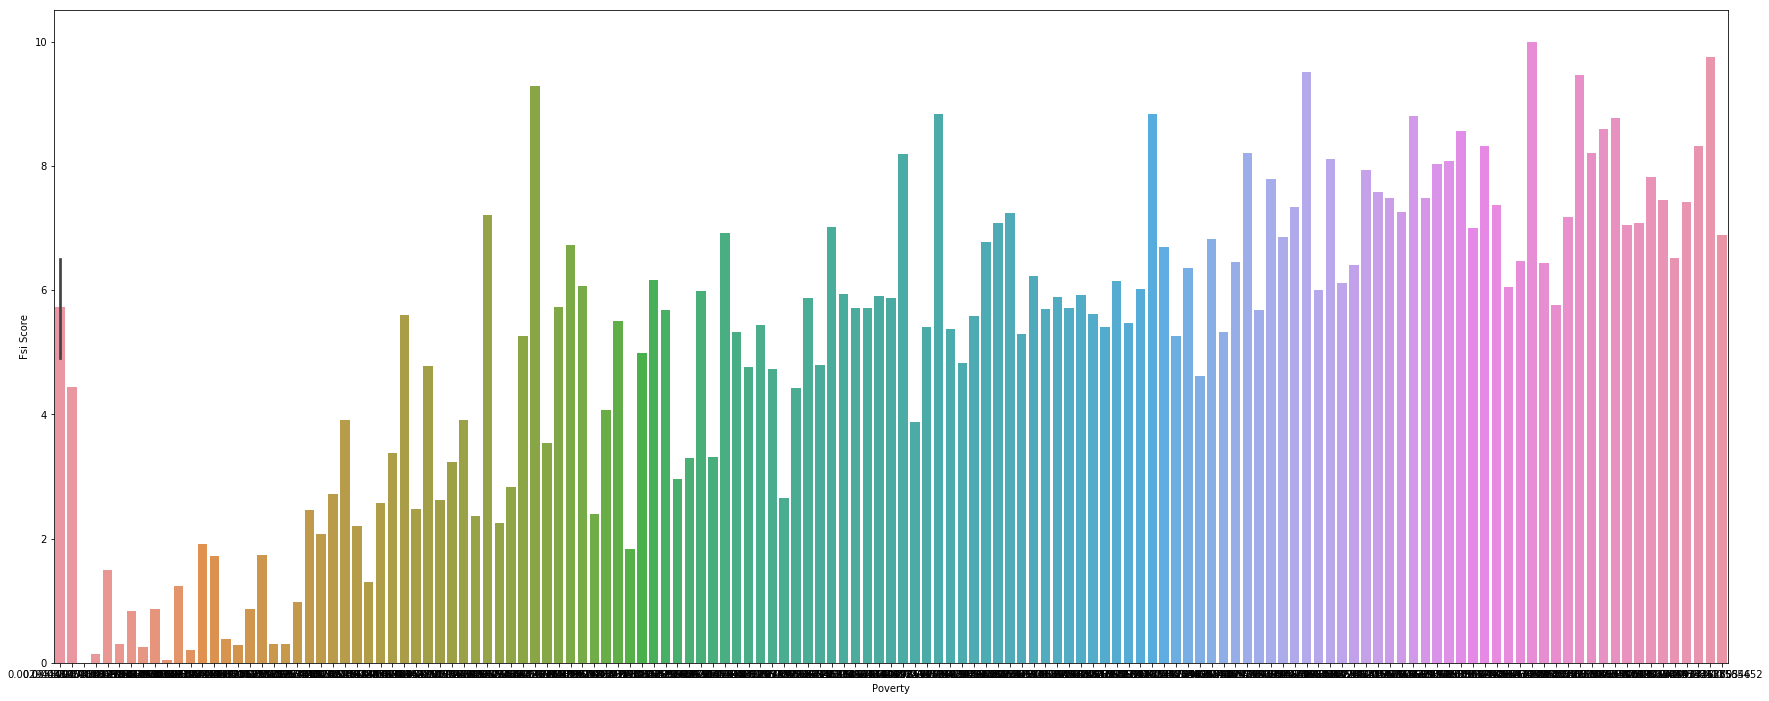

In [22]:
#barplot
plt.figure(figsize=(30, 12))
sns.barplot(df['Poverty'], df['Fsi Score'])

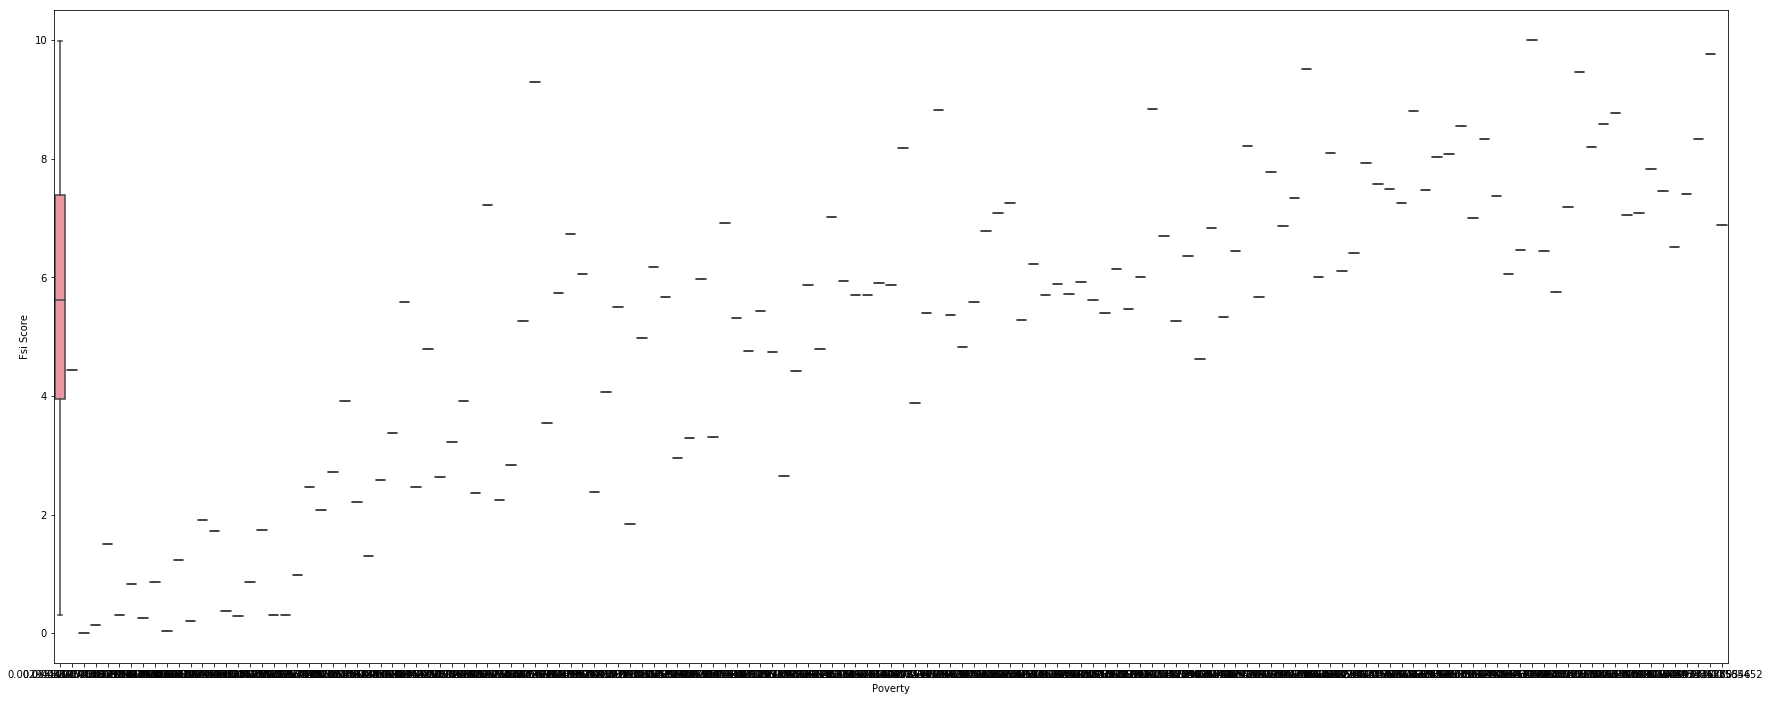

In [24]:
#boxplot
plt.figure(figsize=(30, 12))
sns.boxplot(df['Poverty'], df['Fsi Score'])

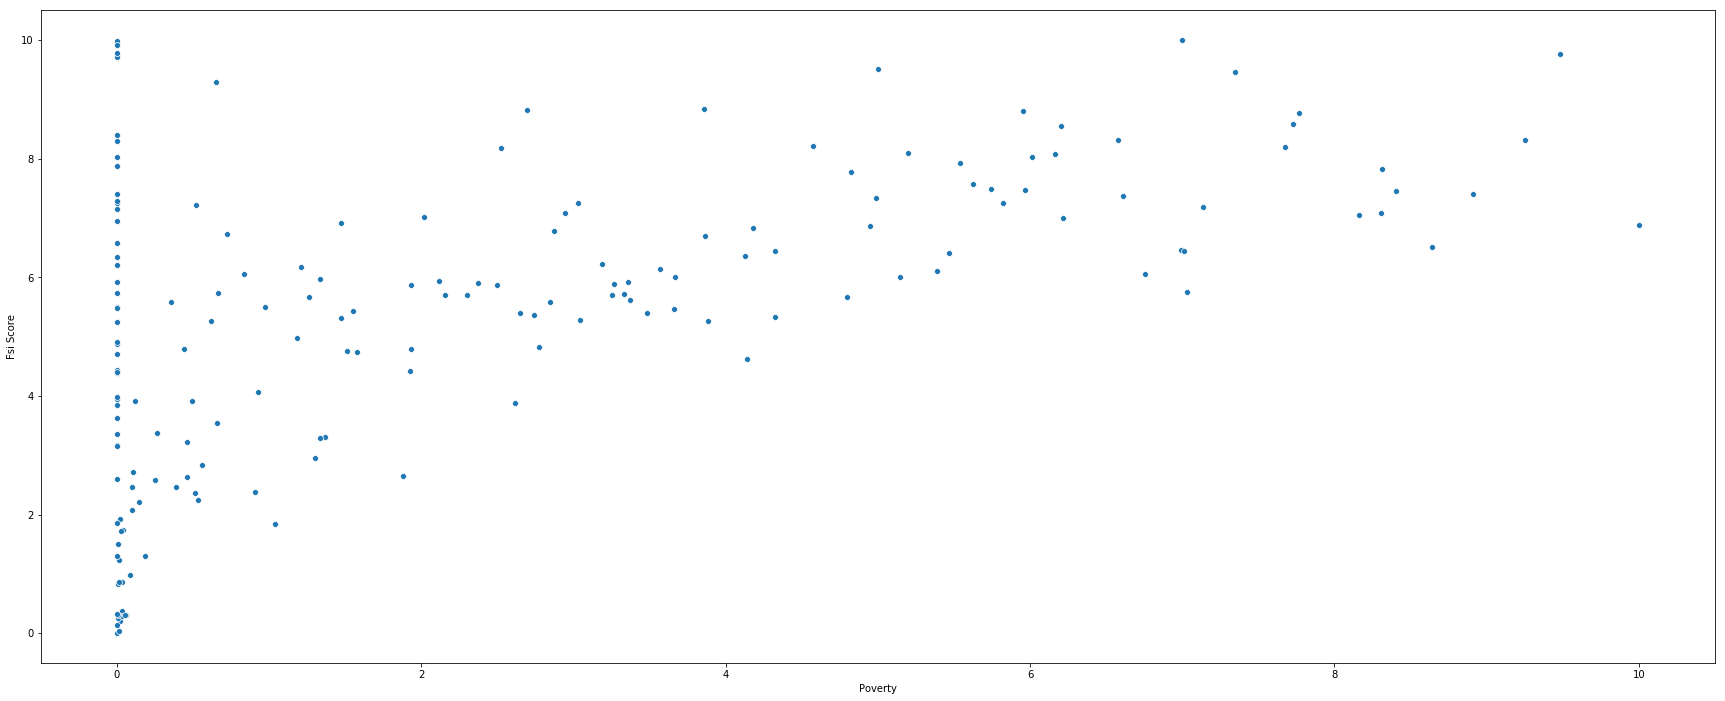

In [32]:
#scatterplot
plt.figure(figsize=(30, 12))
sns.scatterplot(df['Poverty'], df['Fsi Score'])

<Figure size 2160x864 with 0 Axes>

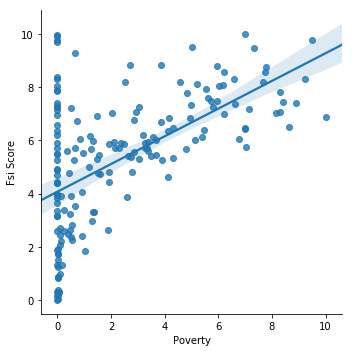

In [35]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Poverty',y='Fsi Score',data=df)

In [31]:
temp=df.sort_values(['Fsi Score'], ascending=[1])
temp.head()

,Country,Year,Rank,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
56,Finland,2018,178th,0.000000,0.000000,0.0,7.557997,5.752933,9.463165,8.199408,0.003370,0.008921,6.309772,0.286480,3.126021
120,Norway,2018,177th,0.041885,0.000000,0.0,8.199988,5.602847,8.497828,8.210057,0.013590,0.039347,6.742794,0.181674,2.141645
155,Switzerland,2018,176th,0.136126,0.003667,0.0,8.123344,6.613482,8.332880,8.405480,0.003392,0.297527,7.006502,0.335479,4.093430
45,Denmark,2018,175th,0.198953,0.000000,0.0,9.628611,5.616237,9.111106,8.208055,0.019461,0.027864,9.000026,0.030244,2.618497
72,Iceland,2018,174th,0.251309,0.010323,0.0,4.108126,5.628665,8.448132,9.636934,0.007773,0.001108,8.568503,0.091198,2.583481


In [30]:
temp.index=range(len(temp))
temp.head()

,Country,Year,Rank,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,Finland,2018,178th,0.000000,0.000000,0.0,7.557997,5.752933,9.463165,8.199408,0.003370,0.008921,6.309772,0.286480,3.126021
1,Norway,2018,177th,0.041885,0.000000,0.0,8.199988,5.602847,8.497828,8.210057,0.013590,0.039347,6.742794,0.181674,2.141645
2,Switzerland,2018,176th,0.136126,0.003667,0.0,8.123344,6.613482,8.332880,8.405480,0.003392,0.297527,7.006502,0.335479,4.093430
3,Denmark,2018,175th,0.198953,0.000000,0.0,9.628611,5.616237,9.111106,8.208055,0.019461,0.027864,9.000026,0.030244,2.618497
4,Iceland,2018,174th,0.251309,0.010323,0.0,4.108126,5.628665,8.448132,9.636934,0.007773,0.001108,8.568503,0.091198,2.583481


In [69]:
ex=temp.drop(temp.index[125:],axis=0)
ex.index=range(len(ex))
ex=ex.drop(ex.index[75:],axis=0)
ex.index=range(len(ex))
#ex=ex.drop(ex.index[0:10],axis=0)
#ex.index=range(len(ex))
ex.head()

,Country,Year,Rank,Fsi Score,Debt,Environment,Financial Sector,Health,Infrastructure,Labour,Poverty,Private Sector,Public Sector,Social Protection,Trade
0,Finland,2018,178th,0.000000,0.000000,0.0,7.557997,5.752933,9.463165,8.199408,0.003370,0.008921,6.309772,0.286480,3.126021
1,Norway,2018,177th,0.041885,0.000000,0.0,8.199988,5.602847,8.497828,8.210057,0.013590,0.039347,6.742794,0.181674,2.141645
2,Switzerland,2018,176th,0.136126,0.003667,0.0,8.123344,6.613482,8.332880,8.405480,0.003392,0.297527,7.006502,0.335479,4.093430
3,Denmark,2018,175th,0.198953,0.000000,0.0,9.628611,5.616237,9.111106,8.208055,0.019461,0.027864,9.000026,0.030244,2.618497
4,Iceland,2018,174th,0.251309,0.010323,0.0,4.108126,5.628665,8.448132,9.636934,0.007773,0.001108,8.568503,0.091198,2.583481


# Positive Correlation

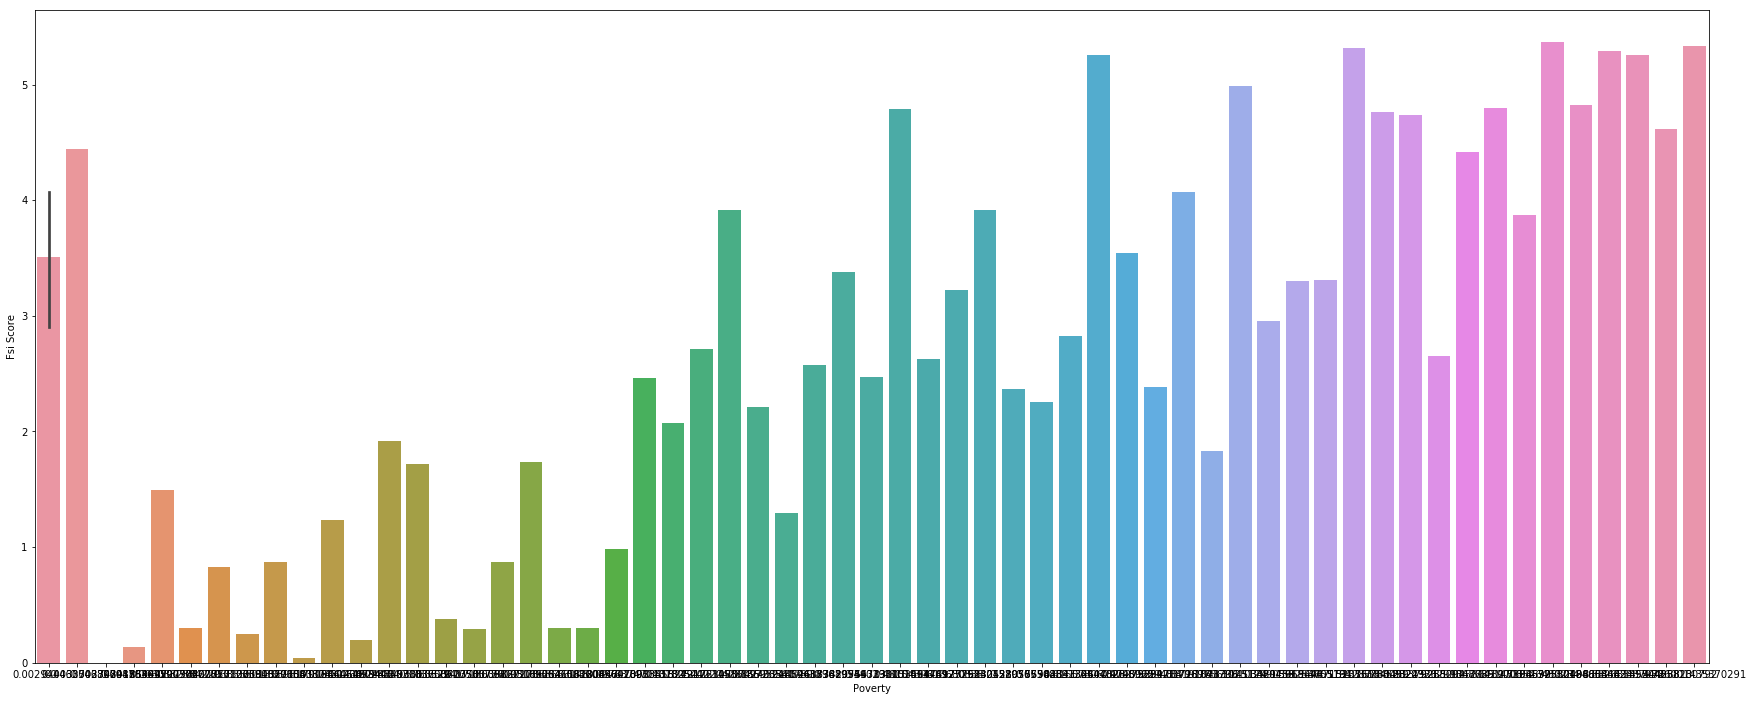

In [81]:
#barplot
plt.figure(figsize=(30, 12))
sns.barplot(ex['Poverty'], ex['Fsi Score'])

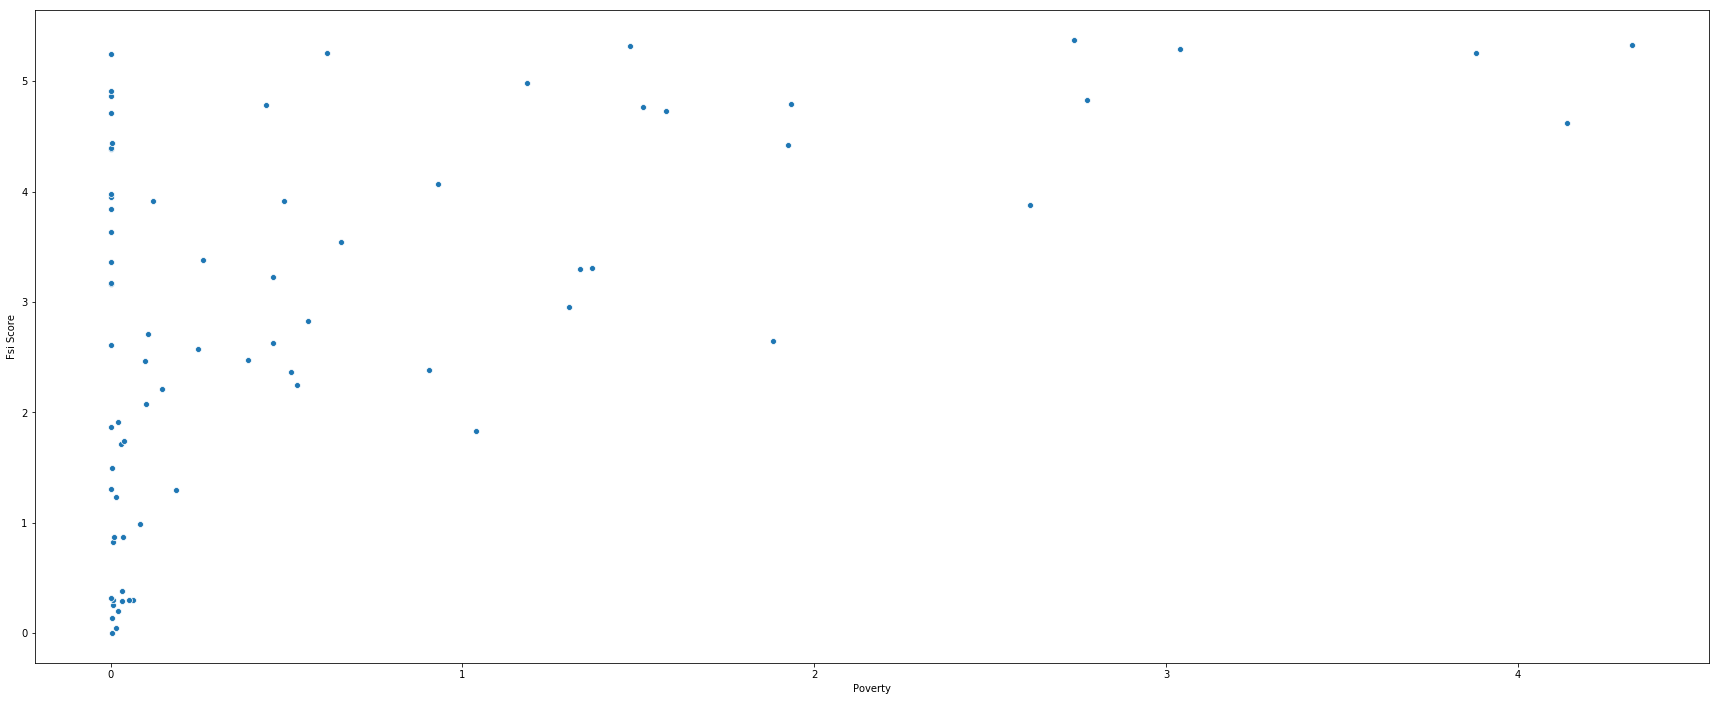

In [82]:
#scatterplot
plt.figure(figsize=(30, 12))
sns.scatterplot(ex['Poverty'], ex['Fsi Score'])

<Figure size 2160x864 with 0 Axes>

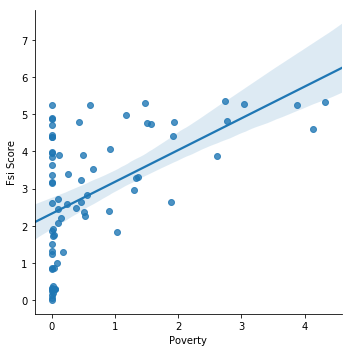

In [83]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Poverty', y='Fsi Score',data=ex)

<Figure size 2160x864 with 0 Axes>

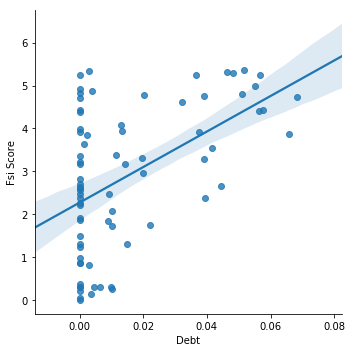

In [84]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Debt',y='Fsi Score',data=ex)

<Figure size 2160x864 with 0 Axes>

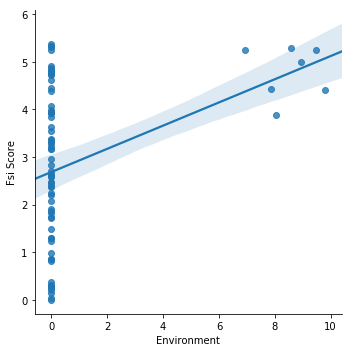

In [85]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Environment',y='Fsi Score',data=ex)

# Negative Correlation

<Figure size 2160x864 with 0 Axes>

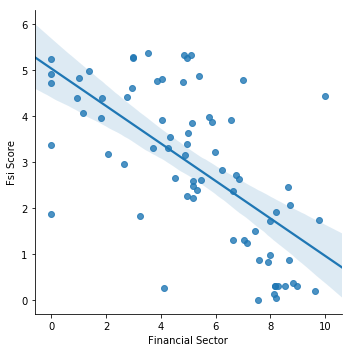

In [86]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Financial Sector',y='Fsi Score',data=ex)

<Figure size 2160x864 with 0 Axes>

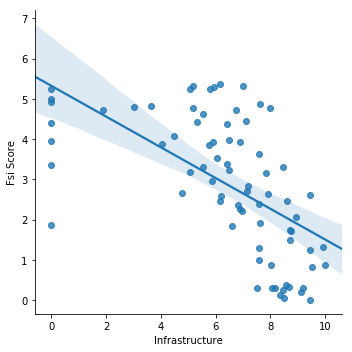

In [87]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Infrastructure',y='Fsi Score',data=ex)

<Figure size 2160x864 with 0 Axes>

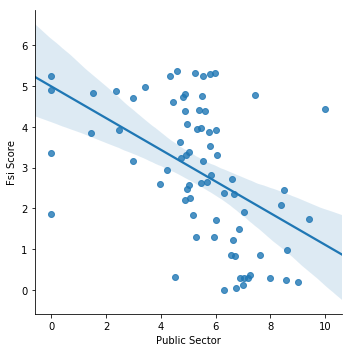

In [88]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Public Sector',y='Fsi Score',data=ex)

<Figure size 2160x864 with 0 Axes>

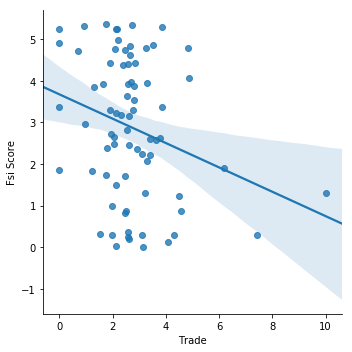

In [90]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Trade',y='Fsi Score',data=ex)

<Figure size 2160x864 with 0 Axes>

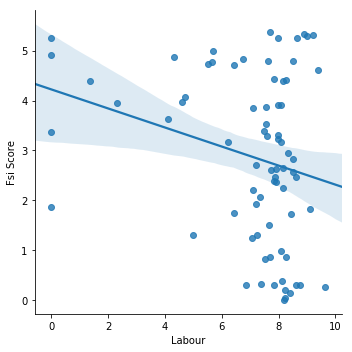

In [91]:
#lmplot
plt.figure(figsize=(30, 12))
sns.lmplot(x='Labour',y='Fsi Score',data=ex)